In [17]:
import numpy as np
import model
%load_ext autoreload
%autoreload 2
from data_generator import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [18]:
g = DataGenerator(images_dir= 'datasets/CelebA')

In [20]:
generator = g.generate(batch_size=1)

In [23]:
next(generator).shape

(1, 32, 32, 3)

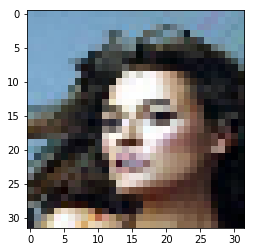

In [31]:
plt.imshow(next(generator)[0])

In [2]:
E_G = model.Encoder_Generator( use_wscale=False)

Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [3]:
Et_Gt = model.new_batch_norm(E_G)

In [4]:
Et = model.extract_encoder(Et_Gt)
E = model.extract_encoder(E_G)


In [5]:
Et_G = model.replace_batch_norm(E_G, Et_Gt, apply = 'encoder')

E_Gt = model.replace_batch_norm(E_G, Et_Gt, apply = 'generator')

In [16]:
x = Sequential([E_Gt, E])
x.summary(), E_Gt.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
model_6 (Model)              (None, 32, 32, 1)         9328388   
_________________________________________________________________
model_4 (Model)              (None, 4, 4, 256)         5189632   
Total params: 9,328,388
Trainable params: 9,320,708
Non-trainable params: 7,680
_________________________________________________________________
____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
Eimages (InputLayer)             (None, 32, 32, 1)     0                                            
____________________________________________________________________________________________________
E4xNIN (Conv2D)                  (None, 32, 32, 256)   512         Eimages[0][0]                    
___________________

(None, None)

In [12]:
from keras.models import Model, Sequential
E_G_twin_E = Model(inputs = E_Gt.input, outputs= E(E_Gt).output)

ValueError: Layer model_4 was called with an input that isn't a symbolic tensor. Received type: <class 'keras.engine.training.Model'>. Full input: [<keras.engine.training.Model object at 0x000002339EE94F28>]. All inputs to the layer should be tensors.

In [10]:
E_G.get_layer('G1a')(Et.output)

<tf.Tensor 'G1a_6/sub:0' shape=(?, 4, 4, 256) dtype=float32>

In [3]:
from keras.models import Model, Sequential

G = Model(inputs=E_G.get_layer('G1a').input, outputs=E_G.output)

C:\Users\Paul\Anaconda3\lib\site-packages\keras\engine\topology.py:1571: UserWarning: Model inputs must come from a Keras Input layer, they cannot be the output of a previous non-Input layer. Here, a tensor specified as input to "model_2" was not an Input tensor, it was generated by layer E1aBN.
Note that input tensors are instantiated via `tensor = Input(shape)`.
The tensor that caused the issue was: E1aBN/cond/Merge:0
  str(x.name))


TypeError: Input layers to a `Model` must be `InputLayer` objects. Received inputs: Tensor("E1aBN/cond/Merge:0", shape=(?, 4, 4, 256), dtype=float32). Input 0 (0-based) originates from layer type `BatchNormalization`.

AttributeError: Layer G1a has multiple inbound nodes, hence the notion of "layer input" is ill-defined. Use `get_input_at(node_index)` instead.

In [13]:
Et_G.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
Eimages (InputLayer)             (None, 32, 32, 1)     0                                            
____________________________________________________________________________________________________
E4xNIN (Conv2D)                  (None, 32, 32, 256)   512         Eimages[0][0]                    
____________________________________________________________________________________________________
E4b (Conv2D)                     (None, 32, 32, 256)   590080      E4xNIN[1][0]                     
____________________________________________________________________________________________________
E4bBN_twin (BatchNormalization)  (None, 32, 32, 256)   1024        E4b[1][0]                        
___________________________________________________________________________________________

In [14]:
from keras.models import Sequential
Sequential([G, D])

In [10]:
D = model.Discriminator(resolution=32)

In [16]:
D.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
Dimages (InputLayer)             (None, 16, 16, 1)     0                                            
____________________________________________________________________________________________________
D3xNIN (Conv2D)                  (None, 16, 16, 256)   256         Dimages[0][0]                    
____________________________________________________________________________________________________
D3xNINWS (WScaleLayer)           (None, 16, 16, 256)   1.0         D3xNIN[0][0]                     
____________________________________________________________________________________________________
add_bias_layer_73 (AddBiasLayer) (None, 16, 16, 256)   256         D3xNINWS[0][0]                   
___________________________________________________________________________________________

In [3]:
tw = model.replace_batch_norm(G)

In [21]:
enc = model.Encoder()

In [6]:
enc_tw = model.replace_batch_norm(enc)

In [7]:
enc.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
Dimages (InputLayer)             (None, 32, 32, 1)     0                                            
____________________________________________________________________________________________________
D4xNIN (Conv2D)                  (None, 32, 32, 256)   256         Dimages[0][0]                    
____________________________________________________________________________________________________
D4xNINWS (WScaleLayer)           (None, 32, 32, 256)   1.0         D4xNIN[0][0]                     
____________________________________________________________________________________________________
add_bias_layer_1 (AddBiasLayer)  (None, 32, 32, 256)   256         D4xNINWS[0][0]                   
___________________________________________________________________________________________